<a href="https://colab.research.google.com/github/tbeucler/2022_Intro_Python/blob/main/Tutorials/W3_S2_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GeoPandas

## 0.Install GeoPandas
Please run the following code blocks in this section to:
* Install the GeoPandas's dependencies and GeoPandas
* Download and unzip the data used in this notebook
* Import GeoPandas and other required modules for the notebook

In [1]:
#Install the GeoPandas's dependencies
!pip install --upgrade pyshp

!pip install --upgrade shapely

!pip install --upgrade descartes

!pip install --upgrade rtree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Install the GeoPandas

!pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Download the data used in this notebook
!gdown 1b1lngOIvuNnZxepbT8RyV3KX1itRky5z

Downloading...
From: https://drive.google.com/uc?id=1b1lngOIvuNnZxepbT8RyV3KX1itRky5z
To: /content/data.zip
100% 25.8M/25.8M [00:00<00:00, 303MB/s]


In [5]:
#Unzip the data used in this notebook
!unzip '/content/data.zip'

Archive:  /content/data.zip
replace data/damselfish-data/DAMSELFISH_distributions.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
#Import GeoPandas and other required modules for the notebook
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')





References:    
1. Geopandas official website: Introduction to GeoPandas
https://geopandas.org/en/stable/getting_started/introduction.html   
2. Automating GIS process
https://autogis-site.readthedocs.io/en/latest/notebooks/L2/01-geopandas-basics.html    
3. Use Data for Earth and Environmental Science in Open Source Python
https://www.earthdatascience.org/courses/use-data-open-source-python/
4. The Shapely User Manual 
https://shapely.readthedocs.io/en/stable/manual.html
5. Geospatial Analysis with Python and R 
https://kodu.ut.ee/~kmoch/geopython2020/index.html
6. Introduction to Geospatial Data in Python 
https://www.datacamp.com/tutorial/geospatial-data-python

# Learning goals
1. Understand the data structure of GeoPandas
2. Read and write geospatial data with GeoPandas
3. Access geospatial data attributes and methods using GeoPandas
4. Perform spatial operations with GeoPandas

## 1. GeoPandas Introduction
**GeoPandas** extends the data science library pandas for geospatial data by combining: 
* **Pandas**: data analysis
* **Shapely**: handle geometries (Deterministic spatial analysis - set theoretic manipulations of planar features)
* **Fiona**: read and write files
* **pyproj**: manage coordinate reference systems
* **matplotlib**: plotting.


## 2. Geopandas Data Structure
* The core data structure is **geopandas.GeoDataFrame**, a subclass of pandas.DataFrame.
* The main difference between GeoDataFrame and DataFrame is that GeoDataFrame contains at least one column **'geometry'**, which contains shapely objects, e.g. points, lines, polygons, multipolygons, etc.
* **geopandas.GeoSeries** is a subclass of pandas.Series. GeoSeries can contain any geometry type and has a GeoSeries.crs attribute (Coordinate Reference System) for projection.
* **GeoDataFrame combines** pandas.Series with traditional data (numerical, boolean, text, etc.) and geopandas.GeoSeries, thus can work with geospatial data.

In [ ]:
### Create a GeoPandas GeoDataFrame from a Pandas DataFrame with coordiantes
### Tutorial: https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

# Create Pandas DataFrame from csv used in the Pandas exercise
path = r'/content/data/usgs_earthquakes_2014.csv'
df_earthquakes = pd.read_csv(path)  

In [ ]:
#Have a look at the Pandas DataFrame 
df_earthquakes.head(2)

In [ ]:
# Create GeoPandas GeoDataFrame from the Pandas DataFrame
gdf_earthquakes = gpd.GeoDataFrame(df_earthquakes, geometry=gpd.points_from_xy(df_earthquakes.longitude, df_earthquakes.latitude))

In [ ]:
# Have a look at the GeoPandas GeoDataFrame and notice the 'geometry' column
gdf_earthquakes.head(2)

In [ ]:
# Take a quick look at the geospatial data contained in the GeoDataFrame on a map
ax = gdf_earthquakes.plot()

## 3. Read and write files
### 3.1 GeoPandas for handing vector format spatial data
* Three fundamental types of **geometric objects** (the spatial data model implemented by shapely & defined by *interior, boundary, and exterior*): 
    * **Point**: A single point defined by a pair of x, y coordinates, e.g. locations of trees
        * *Point class*. *Interior* - exactly one point. *Boundary* - exactly no points. *Exterior* - all other points
    * **Line**: At least two connected points, e.g. roads, streams
        * *LineString and LinearRing classes*. *Interior* - the infinitely many points along its length. *Boundary* - Two end points. *Exterior* - all other points. 
    * **Polygon**: At least three points connected and closed by lines, e.g. boundaries of lakes, countries.
        * *Polygon class*. *Interior* - the infinitely many points within. *Boundary* - one or more lines. *Exterior* - all other points.  
       
### 3.2 Reading files
* Assuming you have a file containing both data and geometry (e.g. GeoPackage, GeoJSON, Shapefile), you can read it using geopandas.read_file(), which automatically detects the filetype and creates a GeoDataFrame. 

### 3.3 Writing files
* To write a GeoDataFrame back to file use GeoDataFrame.to_file(). The default file format is Shapefile, but you can specify your own with the driver keyword.

In [ ]:
# Set filepath 
path = r"/content/data/damselfish-data/DAMSELFISH_distributions.shp"

In [ ]:
# Read data into a GeoDataFrame
gdf_DAMSELFISH = gpd.read_file(path)

In [ ]:
# Check type of the data
type(gdf_DAMSELFISH)

In [ ]:
# Take a quick look at the data
gdf_DAMSELFISH.head(3)

In [ ]:
# Take a quick look at the data on a map
ax = gdf_DAMSELFISH.plot()

In [ ]:
# Create a output path for the data
out_file_path = r"/content/data/damselfish-data/DAMSELFISH_distributions_SELECTION.shp"

# Select first 50 rows, this a the numpy/pandas syntax to ``slice`` parts out a dataframe or array, from position 0 until (excluding) 50
selection = gdf_DAMSELFISH[0:50]

# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(out_file_path)

In [ ]:
# Look at the geometries in the GeoDataFrame
gdf_DAMSELFISH['geometry'].head(3)

In [ ]:
# Check type of the geometry
type(gdf_DAMSELFISH['geometry'][0])

## 4. Attributes and Methods
### 4.1 Area and distance
* To measure the area of each polygon (or MultiPolygon in this specific case), access the GeoDataFrame.area attribute, which returns a pandas.Series. Note that GeoDataFrame.area is just GeoSeries.area applied to the active geometry column.
* Euclidian distance between points

### 4.2 Boundary and centroid
* To get the boundary of each polygon (LineString), access the GeoDataFrame.boundary
* Centroid of line, polygon

### 4.3 Projection
* Coordinate reference systems (CRS) are important because the geometric shapes in a GeoDataFrame are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates related to places on the Earth. A map projection (or a projected coordinate system) is a systematic transformation of the latitudes and longitudes into a plain surface where units are quite commonly represented as meters (instead of decimal degrees).

* As map projections of gis-layers are fairly often defined differently (i.e. they do not match), it is a common procedure to redefine the map projections to be identical in both layers. It is important that the layers have the same projection as it makes it possible to analyze the spatial relationships between layers, such as in conducting the Point in Polygon spatial query.
* The EPSG number (“European Petroleum Survey Group”) is a code that tells about the coordinate system of the dataset.

### 4.4 Plot
* GeoPandas can plot maps, so we can check how the geometries appear in space. To plot the active geometry, call GeoDataFrame.plot().

In [ ]:
# Calculate and store the areas individual polygons
gdf_DAMSELFISH['area'] = gdf_DAMSELFISH.area
gdf_DAMSELFISH['area'].head(3)

In [ ]:
# Get the boundary of each polygon 
gdf_DAMSELFISH['boundary'] = gdf_DAMSELFISH.boundary
gdf_DAMSELFISH['boundary'].head(3)

In [ ]:
# Get the centroid of each polygon
gdf_DAMSELFISH['centroid'] = gdf_DAMSELFISH.centroid
gdf_DAMSELFISH['centroid'].head(3)

In [ ]:
# Measure distance between each centroid and the first centroid
first_point = gdf_DAMSELFISH['centroid'].iloc[0]
gdf_DAMSELFISH['distance'] = gdf_DAMSELFISH['centroid'].distance(first_point)
gdf_DAMSELFISH['distance'].head(3)

In [ ]:
# Reading the data from the Europe_borders.shp file
path =  r"/content/data/Europe_borders/Europe_borders.shp"
gdf_Europe_borders = gpd.read_file(path)

In [ ]:
# See the current coordinate reference system from .crs attribute
gdf_Europe_borders.crs

In [ ]:
# Convert (aka reproject) into Lambert Azimuthal Equal Area projection (EPSG: 3035)
gdf_Europe_borders_proj = gdf_Europe_borders.to_crs(epsg=3035)

In [ ]:
# See the current coordinate reference system from .crs attribute
gdf_Europe_borders_proj.crs

In [ ]:
# Plot GeoDataFrames
# Understand the difference between the projections
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
# Plot the WGS84
gdf_Europe_borders.plot(facecolor='gray', ax=axs[0]);

# Add title
axs[0].set_title("WGS84 CRS", y=1.05);

# Plot the one with ETRS-LAEA projection
gdf_Europe_borders_proj.plot(facecolor='blue', ax=axs[1]);

# Add title
axs[1].set_title("ETRS Lambert Azimuthal Equal Area projection", y=1.05);

# Remove empty white space around the plot
fig.tight_layout()

## 5. Spatial Relationships and Operations

### 5.1 Geometric Manipulations
GeoPandas makes available all the tools for geometric manipulations in the shapely library: buffer, boundary, convex_hull, envelope, unary_union
### 5.2 Set-Operations with Overlay
When working with multiple spatial datasets – especially multiple polygon or line datasets – users often wish to create new shapes based on places where those datasets overlap (or don’t overlap). These manipulations are often referred using the language of sets – intersections, unions, and differences. These types of operations are made available in the geopandas library through the overlay() method.

In [ ]:
# Tutorial: https://geopandas.org/en/stable/docs/user_guide/geometric_manipulations.html

# Generate a GeoSeries containing 2000 random points
import numpy as np
from shapely.geometry import Point
xmin, xmax, ymin, ymax = 900000, 1080000, 120000, 280000
xc = (xmax - xmin) * np.random.random(2000) + xmin
yc = (ymax - ymin) * np.random.random(2000) + ymin
pts = gpd.GeoSeries([Point(x, y) for x, y in zip(xc, yc)])

In [ ]:
# Draw a circle with fixed radius around each point
circles = pts.buffer(2000)

In [ ]:
# Collapse these circles into a single MultiPolygon geometry with
mp = circles.unary_union

In [ ]:
mp

In [ ]:
type(mp)

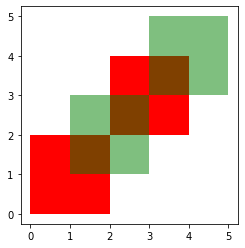

In [7]:
# Tutorial: https://geopandas.org/en/stable/docs/user_guide/set_operations.html
# Create some example data
from shapely.geometry import Polygon

polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                              Polygon([(2,2), (4,2), (4,4), (2,4)])])


polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                              Polygon([(3,3), (5,3), (5,5), (3,5)])])


df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})

df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

ax = df1.plot(color='red');

df2.plot(ax=ax, color='green', alpha=0.5)

In [8]:
# The overlay() method with how='intersection', it returns only those geometries that are contained by both GeoDataFrames:
res_intersection = df1.overlay(df2, how='intersection')

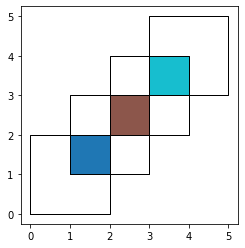

In [9]:
ax = res_intersection.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k')